In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_csv('spam.tsv', sep = '\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [3]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [4]:
df.shape

(5572, 4)

In [5]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [6]:
data = df.drop_duplicates()

In [7]:
data.shape

(5169, 4)

In [8]:
data['label'].value_counts()

label
ham     4516
spam     653
Name: count, dtype: int64

In [9]:
ham = data[data['label']=='ham']
ham.shape

(4516, 4)

In [10]:
spam = data[data['label']=='spam']
spam.shape

(653, 4)

In [11]:
ham = ham.sample(spam.shape[0])

In [12]:
ham.shape

(653, 4)

In [13]:
df_final = pd.concat([ham, spam], axis=0, ignore_index=True)

In [14]:
df_final.shape

(1306, 4)

In [15]:
df_final.head()

,label,message,length,punct
0,ham,i cant talk to you now.i will call when i can....,64,3
1,ham,Oh unintentionally not bad timing. Great. Fing...,104,4
2,ham,Did you see that film:),23,2
3,ham,There are no other charges after transfer char...,86,0
4,ham,Hello hun how ru? Its here by the way. Im good...,149,6


In [16]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = (10,4)
plt.style.use('ggplot')

In [17]:
ham.columns

Index(['label', 'message', 'length', 'punct'], dtype='object')

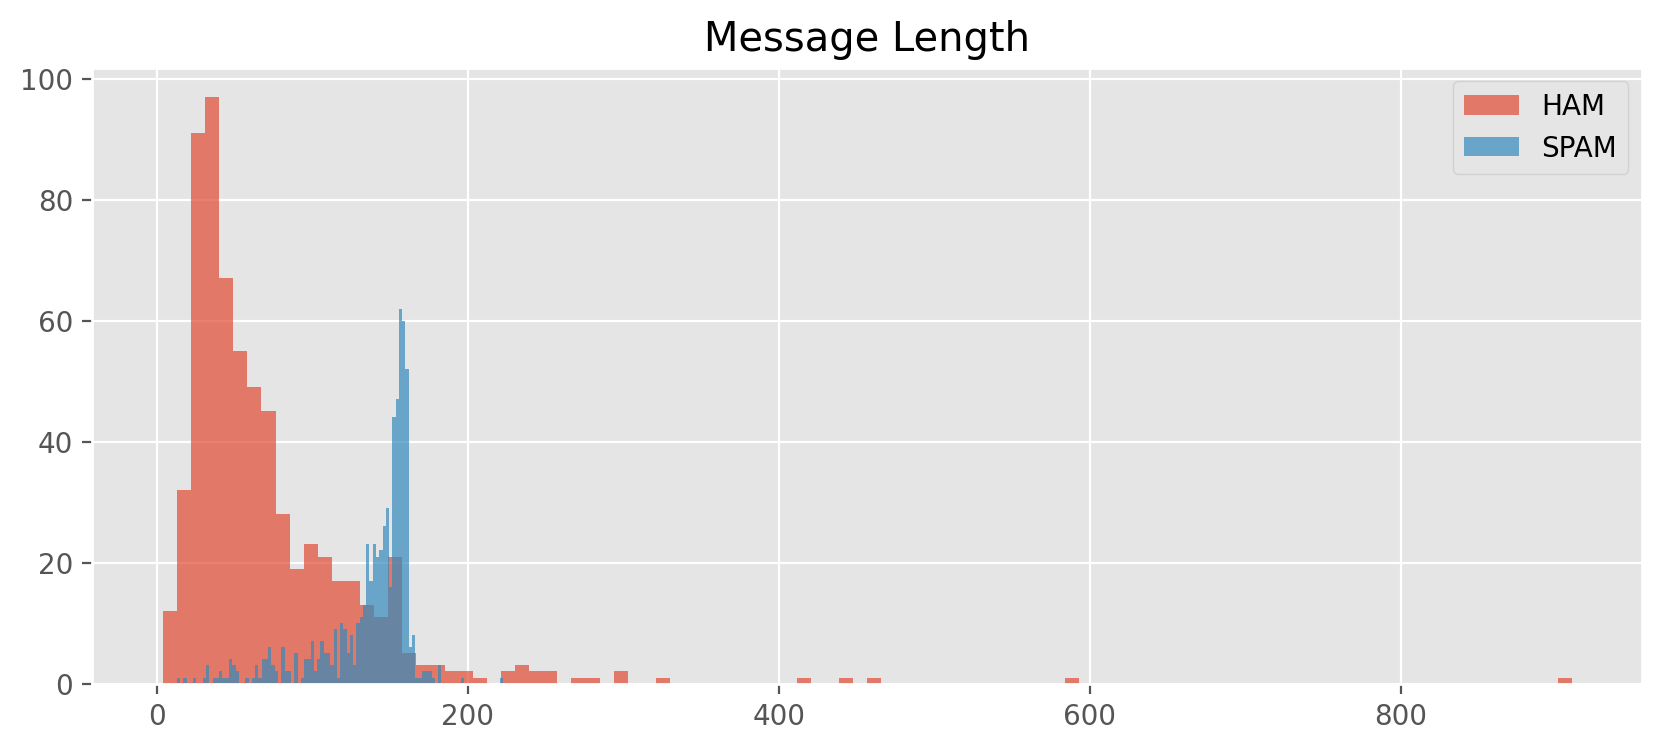

In [18]:
plt.hist( ham['length'], bins = 100, alpha=0.7, label='HAM' )
plt.hist( spam['length'], bins = 100, alpha=0.7, label='SPAM' )
plt.title('Message Length')
plt.legend()
plt.show()

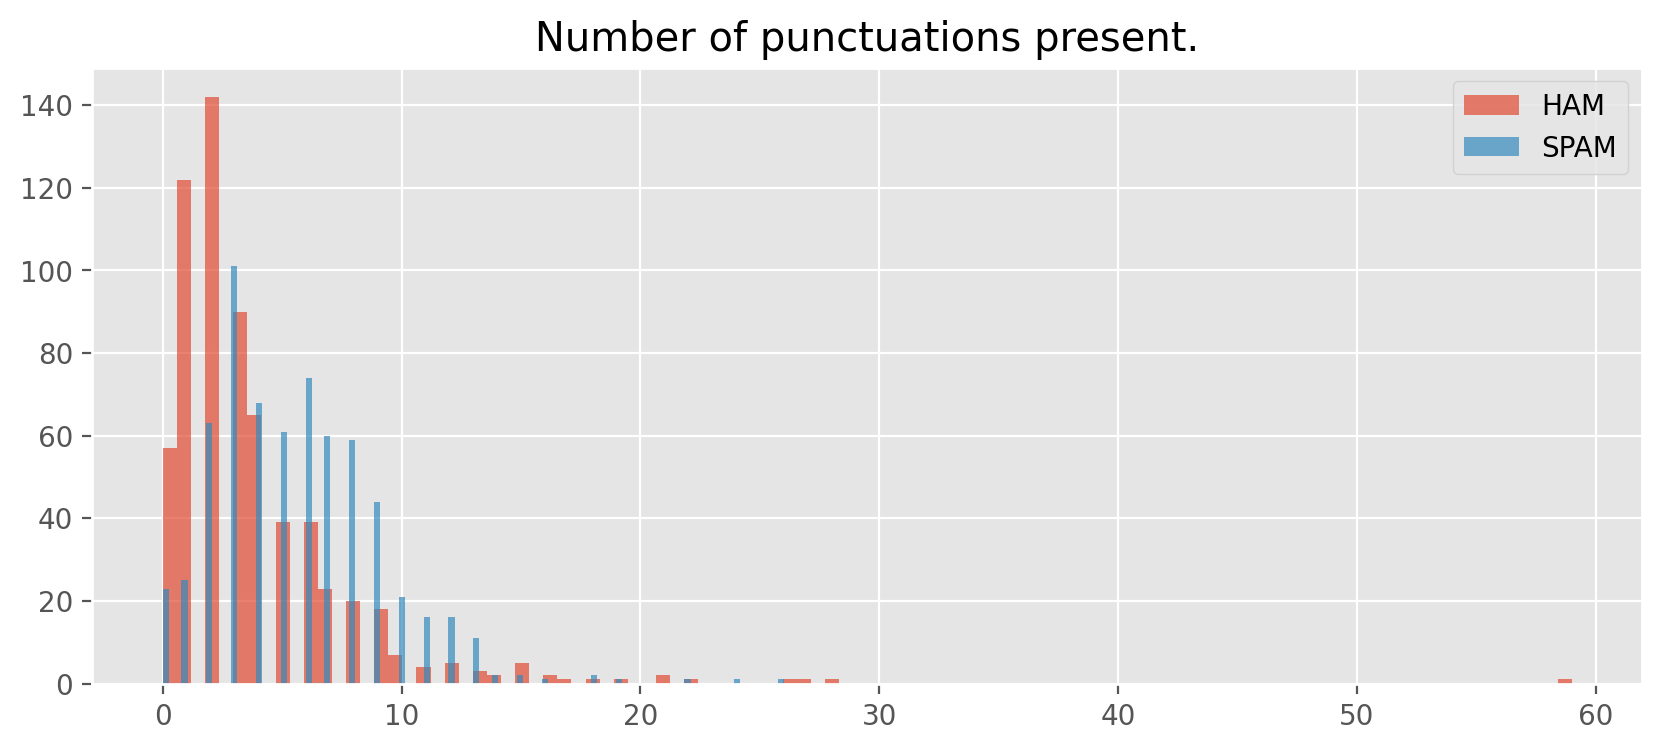

In [19]:
plt.hist( ham['punct'], bins = 100, alpha=0.7, label='HAM' )
plt.hist( spam['punct'], bins = 100, alpha=0.7, label='SPAM' )
plt.title('Number of punctuations present.')
plt.legend()
plt.show()

In [23]:
 X_train, X_test, y_train, y_test = train_test_split(df_final['message'], df_final['label'], test_size=0.2, random_state=42, shuffle = True, stratify=df_final['label'])

In [24]:
X_train.shape, X_test.shape

((1044,), (262,))

In [26]:
clf = Pipeline([('tfidf', TfidfVectorizer()),
               ('rfc', RandomForestClassifier(n_jobs=-1))])

clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('rfc', RandomForestClassifier(n_jobs=-1))])

In [27]:
y_pred = clf.predict(X_test)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.94      0.99      0.96       131
        spam       0.99      0.93      0.96       131

    accuracy                           0.96       262
   macro avg       0.96      0.96      0.96       262
weighted avg       0.96      0.96      0.96       262



In [31]:
clf.predict(['you won lottery ticket worth $500, please click here to claim',
            'hi how are you doing today',
            'Can you please send me some money?'])

array(['spam', 'ham', 'ham'], dtype=object)

In [33]:
import pickle

pickle.dump(clf, open('model.pkl', 'wb'))

In [34]:
model = pickle.load(open('model.pkl', 'rb'))

In [35]:
model.predict(['you won lottery ticket worth $500, please click here to claim',
            'hi how are you doing today',
            'Can you please send me some money?'])

array(['spam', 'ham', 'ham'], dtype=object)